<center><h1 style="color: pink"> Welcome to the Airbnb Mini Practice Project </h1>


As you've worked through Python Sub Unit you would have realised there are a number of powerful functions you can use.

You would have covered the following libraries:

<li> Matplotlib </li>
<li> Pandas </li> 
    
These are all powerful libraries to help augment your data analysis capabilities.
In these set of exercises below, we've crafted a few extra challenges to reinforce your understanding of how these libraries work. 

Please note there is a particular emphasis on the Pandas Library as this is the most critical library you will be using throughout your career as a data analyst. You'll see the similarities that hold with respect to Pandas and Pivot Tables!
    
<b><u>`The most important thing to build confidence with Python is to practice all the time. This way you will build muscle memory. Don't simply copy the code you've written previously but write it again and again so you build the muscle memory associated with these coding libraries.`</u>

<H3>  Let's get started! </H3>

We've provided a file called `airbnb_2.csv` that you'll need to import.

Let's do this first before we start our analysis.

<b> Don't forget to import the libraries you need to read .csv files! </b> 



### Step 1: <span style="color:pink">Import Libraries</span> 

Import the pandas library below. 

<b> Put your code in the box below </b>


In [44]:
import pandas as pd

### Step 2: <span style="color:pink">Ingest the Airbnb CSV file into your Jupyter Notebook</span> 

Now that you have the Pandas Libraries imported, it's time to import the airbnb dataset.

<b> i) Please ingest the airbnb dataset using the `.read_csv()` syntax.

ii) Upon completion of this, use .info() to better understand the variables inside your dataset.
<p>    

<b> Put your code in the box below </b>

In [45]:
airbnb_data = pd.read_csv('airbnb_2.csv')

airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Step 3: <span style="color:pink">Exploring your data with Pandas</span> 

The rest of these questions will have you focus on using the following Pandas Skills:

<li> Subsetting a Pandas dataframe using [] and boolean operators </li>
<li> Summing up Records with value_counts()</li>
<li> Creating calculated fields </li>
<li> Group By in Pandas </li> 
<li> Creating Bar Plots with Matplotlib</li> 



<b> i)  Please count how many airbnb listings are in each of the 5 Neighbourhood Groups (Manhattan, Brooklyn, Queens, Bronx, Staten Island) and identify which Neighbourhood Groups has the largest number of Airbnb Listings </b>

Hint: Think about how you might use the `.value_counts()` methodology! 

<p>

In [46]:
neighborhood_counts = airbnb_data['neighbourhood_group'].value_counts()
print("Listings count in each Neighborhood Group:")
print(neighborhood_counts)
print(f"\nThe Neighborhood Group with the largest number of Airbnb Listings is: {neighborhood_counts.index[0]}")

Listings count in each Neighborhood Group:
neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

The Neighborhood Group with the largest number of Airbnb Listings is: Manhattan


We want to focus our attention on the Neighbourhood Groups that have the top 3 number of Airbnb Listings.

<b> ii) Calculate the % listings that each Neighbourhood Group contains. </b>

Hint: Take a look at the examples shown <a href = "https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html"> here!</a>  

In [47]:
total_listings = len(airbnb_data)
neighborhood_percentages = (neighborhood_counts / total_listings)

top_3_groups = neighborhood_percentages.nlargest(3)
print("\nTop 3 Neighborhood Groups by percentage of listings:")
print(top_3_groups)


Top 3 Neighborhood Groups by percentage of listings:
neighbourhood_group
Manhattan    0.443011
Brooklyn     0.411167
Queens       0.115881
Name: count, dtype: float64


<b> iii) Create a new calculated field called Revenue and place this into the Airbnb Dataframe. This is to be calculated by using the Price Column x Number_Of_Reviews Columns </b>

<b> Put your code in the box below </b>

In [48]:
airbnb_data['Revenue'] = airbnb_data['price'] * airbnb_data['number_of_reviews']

columns_order = [
    'id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
    'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 
    'number_of_reviews', 'last_review', 'reviews_per_month', 
    'calculated_host_listings_count', 'availability_365', 'Revenue'
]

airbnb_data = airbnb_data[columns_order]

pd.set_option('display.max_columns', None) 
pd.set_option('display.expand_frame_repr', False) 

print(airbnb_data.head())

     id                                              name  host_id    host_name neighbourhood_group neighbourhood  latitude  longitude        room_type  price  minimum_nights  number_of_reviews last_review  reviews_per_month  calculated_host_listings_count  availability_365  Revenue
0  2539                Clean & quiet apt home by the park     2787         John            Brooklyn    Kensington  40.64749  -73.97237     Private room    149               1                  9  19/10/2018               0.21                               6               365     1341
1  2595                             Skylit Midtown Castle     2845     Jennifer           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt    225               1                 45  21/05/2019               0.38                               2               355    10125
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632    Elisabeth           Manhattan        Harlem  40.80902  -73.94190     Private r

<h2 style='color:salmon'> Sample Output </h3>

<b> iv) Create a Bar Plot that shows which Neighbourhood Group has the highest average revenues. In order to best
calculate this, you'd want to consider how you can use the .groupby() syntax to assist you! </b>

Hint: If you're stuck, we recommend you go back to <a href = https://learn.datacamp.com/courses/manipulating-dataframes-with-pandas> this </a> datacamp link. Specifically Chapter 4 which covers how GROUP BY is used in Pandas.

Remember, the syntax for GROUP BY is below:

`dataframe.groupby(['SomeColumn']).someAggregation()`

<b> Put your code in the box below </b>

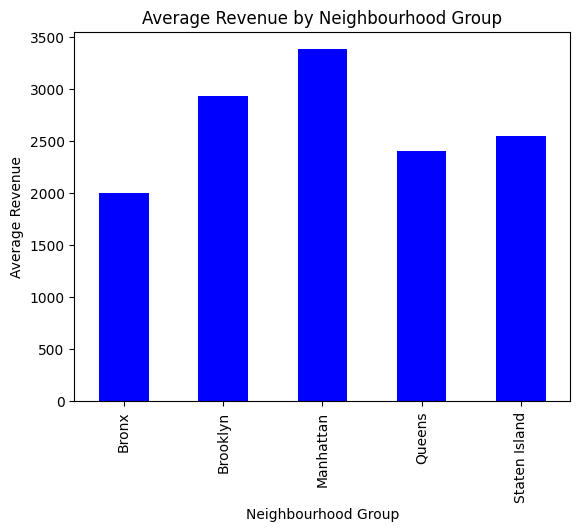

In [49]:

import matplotlib.pyplot as plt

avg_revenue_by_group = airbnb_data.groupby('neighbourhood_group')['Revenue'].mean()


avg_revenue_by_group.plot(kind='bar', color='blue')

plt.title('Average Revenue by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Revenue')

plt.show()


<h2 style='color:salmon'> Sample Output </h3>

<h3> <span style="color:pink">Challenge Questions</span> </h3>

<b> V) Filter the Airbnb Dataframe to include only the Neighbourhood Groups `Manhattan`, `Brooklyn` and `Queens`. 
    
Upon completion of this, identify the `top 3 Revenue Generating Neighborhoods` within each of the `three Neighbourhood_Groups`. This should give us 9 Overall Rows: 3 of the top generating neighbourhoods within each of the 3 Neighbourhood_Groups </b>

This is a tricky question that will *test* your group-by skills.

We recommend you consider breaking down the query into a number of steps.

    condition1 = someDataFrame['someColumn']=='someCondition'
    condition2 = someDataFrame['someColumn']=='someCondition'
    
<b> Step One - Filter the Dataframe using the Conditions </b>

    filtered_dataframe = someDataFrame[condition1 OR condition 2] 
    
You can also make use of the `.isin()` syntax to help filter on multiple conditions in a cleaner manner!

    dataframe['SomeColumn'].isin(['A','B','C'])
        
<b> Step Two - Group the Data by Neighbourhood_Group and Neighbourhood. </b>
    
Remember the dataframe syntax for grouping by is:
    
`dataframe.groupby(['SomeColumn']).someAggregation()`
    
Once you've now grouped your results - how can you ensure you only return the <u> top 3 for each neighbourhood group?</u>
    
This is where you'll need to make use of the following functions:
    `dataframe.reset_index()`
    `dataframe.groupby()`
    `dataframe.head()`
   
You will want to make use of the .reset_index(inplace=True) function to help reset the indexes in 
your Grouped Up Dataframe...!
      
<b> Put your code in the box below </b>

In [50]:
filtered_df = airbnb_data[airbnb_data['neighbourhood_group'].isin(['Manhattan', 'Brooklyn', 'Queens'])]

grouped_df = filtered_df.groupby(['neighbourhood_group', 'neighbourhood'])['Revenue'].sum().reset_index()

top_neighborhoods = grouped_df.sort_values(by='Revenue', ascending=False).groupby('neighbourhood_group').head(3)

top_neighborhoods = top_neighborhoods.sort_values(by='Revenue', ascending=False).reset_index(drop=True)

print(top_neighborhoods)

  neighbourhood_group       neighbourhood   Revenue
0            Brooklyn        Williamsburg  12389011
1            Brooklyn  Bedford-Stuyvesant  12352457
2           Manhattan              Harlem   8598692
3           Manhattan      Hell's Kitchen   8238991
4           Manhattan        East Village   7574535
5            Brooklyn            Bushwick   4762224
6              Queens             Astoria   1880840
7              Queens    Long Island City   1374945
8              Queens            Flushing   1140450


<h2 style='color:salmon'> Sample Output </h3>

<b> VI) Building on the previous question where you identified the top 3 Neighbourhoods within each of the three neighbourhood_groups based off Revenues, please filter the Airbnb Dataframe to include only these neighbourhoods. 
    
Upon completion of this, identify the  <b>`top average revenue generating room type`</b> for each of the nine neighbourhoods and plot this out in a Bar Chart.</b>

<b> Step One. Think carefully regarding how you can make use of the <u> list of 9 neighbourhoods </u> you've previously analyzed. </b>
    
<b> Step Two. Filter the original `airbnb` dataframe you created, to include only these top 9 neighbourhoods. </b>

<b> Step Three: Apply your standard aggregation syntax you've previously learned when using the .groupby() function </b>

<b> Step Four. Just as you previously made use of `.head()` and `.reset_index()` to get the top neighbourhoods - how might you use a similar approach to get the top `room_type` for each `neighbourhood`? </b>

<b> Step Five. Create a bar plot from your dataframe using the `matplotlib` plotting library syntax. </b>

We've included an example of the syntax below: 

`plt.bar(x=dataframe['x-axis'], height=dataframe['y-axis']`



This is a tricky question that will *test* your group-by skills. Think back to the previous question and how you approached this; you can approach this in a similar manner. 
   
    
 <b> Put your code in the box below </b>      

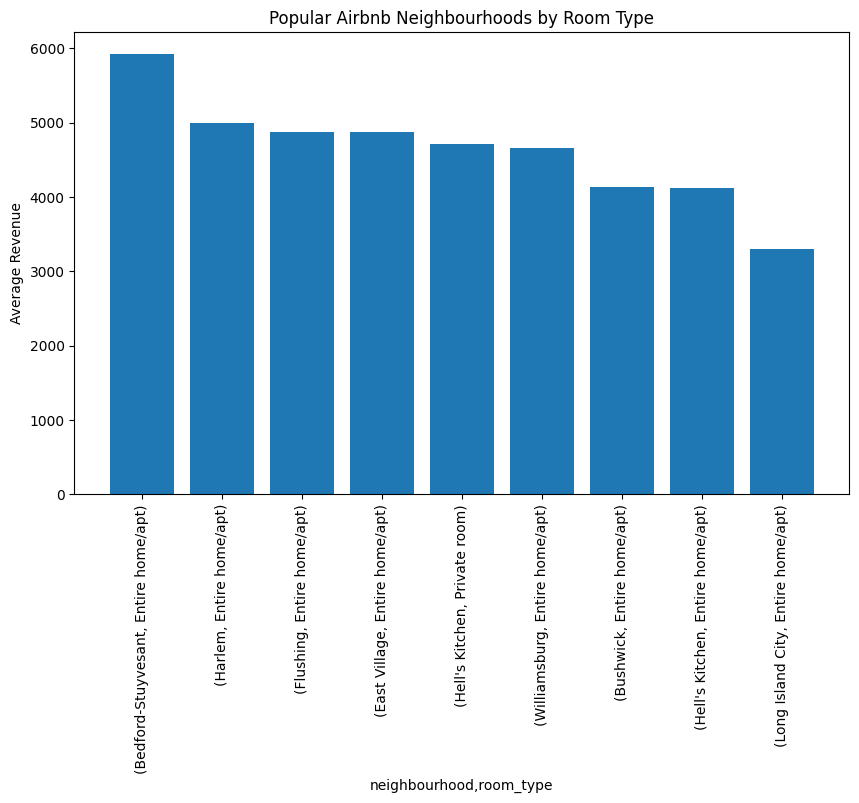

In [51]:

filtered_df = airbnb_data[airbnb_data['neighbourhood'].isin(['Williamsburg', 'Bedford-Stuyvesant', 'Bushwick', 'Harlem', 'Hell\'s Kitchen', 'East Village', 'Astoria', 'Long Island City', 'Flushing'])]

grouped_df = filtered_df.groupby(['neighbourhood', 'room_type'])['Revenue'].mean().reset_index()

top_grouped_df = grouped_df.sort_values(by='Revenue', ascending=False).head(9)

plt.figure(figsize=(10,6))
plt.bar(top_grouped_df.apply(lambda x: f"({x['neighbourhood']}, {x['room_type']})", axis=1), top_grouped_df['Revenue'])

plt.title('Popular Airbnb Neighbourhoods by Room Type')
plt.xlabel('neighbourhood,room_type')
plt.ylabel('Average Revenue')
plt.xticks(rotation=90)
plt.show()

<h2 style='color:salmon'> Sample Output </h3>